# Churn Assignment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

## DATA Cleaning

In [6]:
df = df.drop(["customerID"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
3029.1      1
4062.2      1
289.3       1
4245.55     1
4946.05     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
df = df[df.TotalCharges != " "]

In [10]:
df["TotalCharges"].value_counts()

20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
           ..
3029.1      1
4062.2      1
289.3       1
4245.55     1
4946.05     1
Name: TotalCharges, Length: 6530, dtype: int64

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# a. Identify the Target Variable and Splitting the Data into Train and Test

In [13]:
y = df["Churn"]
x = df[["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges"]]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [15]:
print(X_train.shape,y_train.shape)

(4922, 19) (4922,)


# b. Separating Categorical and Numerical Columns:

In [16]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

## Categorical 

In [17]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,Male,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5790,Female,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
6498,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check
880,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2784,Female,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


## Numerical 

In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

## c. Applying OneHotEncoding on Categorical Columns

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6498,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
880,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2784,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## e. Rescaling the Numerical Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,-0.439559,0.019693,-0.338074,-0.276449
5790,-0.439559,0.305384,-0.464443,-0.112702
6498,-0.439559,-1.286319,0.581425,-0.974430
880,-0.439559,-0.919003,1.505913,-0.550676
2784,-0.439559,-1.163880,1.106854,-0.835971


## f. Concatinating the Encoded Categorical Features and ReScaled Numerical Features:

In [21]:
X_train_transformed = pd.concat([X_train_cat_ohe, X_train_num_rescaled], axis=1)

X_train_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.439559,0.019693,-0.338074,-0.276449
5790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.439559,0.305384,-0.464443,-0.112702
6498,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.439559,-1.286319,0.581425,-0.974430
880,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.439559,-0.919003,1.505913,-0.550676
2784,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.439559,-1.163880,1.106854,-0.835971


## g. Preparing Test Data

In [22]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
942,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.85,2001.00
3730,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,5921.35
1761,Male,0,No,No,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1513.60
2283,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.55,71.55
1872,Female,0,Yes,Yes,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 942 to 4987
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2110 non-null   object 
 1   SeniorCitizen     2110 non-null   int64  
 2   Partner           2110 non-null   object 
 3   Dependents        2110 non-null   object 
 4   tenure            2110 non-null   int64  
 5   PhoneService      2110 non-null   object 
 6   MultipleLines     2110 non-null   object 
 7   InternetService   2110 non-null   object 
 8   OnlineSecurity    2110 non-null   object 
 9   OnlineBackup      2110 non-null   object 
 10  DeviceProtection  2110 non-null   object 
 11  TechSupport       2110 non-null   object 
 12  StreamingTV       2110 non-null   object 
 13  StreamingMovies   2110 non-null   object 
 14  Contract          2110 non-null   object 
 15  PaperlessBilling  2110 non-null   object 
 16  PaymentMethod     2110 non-null   object

## Categorical Test Data

In [24]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [27]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Numerical Test Data

In [25]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,0,24,79.85,2001.00
3730,0,57,104.50,5921.35
1761,0,58,24.45,1513.60
2283,0,1,71.55,71.55
1872,0,41,19.70,804.25


In [26]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,-0.439559,-0.347623,0.499951,-0.128378
3730,-0.439559,0.999203,1.319685,1.600302
1761,-0.439559,1.040015,-1.342374,-0.343297
2283,-0.439559,-1.286319,0.223935,-0.979170
1872,-0.439559,0.346196,-1.500335,-0.656086


## X - Test Data (CAT+NUM)

In [28]:
X_test_transformed = pd.concat([X_test_cat_ohe, X_test_num_rescaled], axis=1)

X_test_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.439559,-0.347623,0.499951,-0.128378
3730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.439559,0.999203,1.319685,1.600302
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-0.439559,1.040015,-1.342374,-0.343297
2283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.439559,-1.286319,0.223935,-0.979170
1872,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.439559,0.346196,-1.500335,-0.656086


# KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [30]:
y_test_pred_knn = classifier.predict(X_test_transformed)

In [33]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_knn})
knn_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print(accuracy_score(y_test,y_test_pred_knn))

0.7554502369668247


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_transformed, y_train)

LogisticRegression()

In [35]:
y_test_pred_log = logistic.predict(X_test_transformed)

In [37]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_log})
knn_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [36]:
print(accuracy_score(y_test,y_test_pred_log))

0.7971563981042654


# Support Vector Machines

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

SVC()

In [39]:
y_test_pred_svc = svc.predict(X_test_transformed)

In [42]:
svm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_svc})
svm_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [40]:
print(accuracy_score(y_test,y_test_pred_svc))

0.7895734597156399


# Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier  = DecisionTreeClassifier()
DTclassifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [44]:
y_test_pred_DTC = DTclassifier.predict(X_test_transformed)

In [46]:
dtc_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_DTC})
dtc_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [45]:
print(accuracy_score(y_test,y_test_pred_DTC))

0.7208530805687203


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [48]:
y_test_pred_rtc = RFclassifier.predict(X_test_transformed)

In [51]:
rfc_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rtc})
rfc_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [49]:
print(accuracy_score(y_test,y_test_pred_rtc))

0.7786729857819905


## Accuracy Score


In [53]:
data = [["KNeighborsClassifier",0.7554502369668247],["LogisticRegression",0.7971563981042654],["SVC",0.7895734597156399],["DecisionTreeClassifier",0.7208530805687203],["RandomForestClassifier",0.7786729857819905]]
data = pd.DataFrame(data, columns=["classifiers","prediction"])

In [54]:
data

,classifiers,prediction
0,KNeighborsClassifier,0.755450
1,LogisticRegression,0.797156
2,SVC,0.789573
3,DecisionTreeClassifier,0.720853
4,RandomForestClassifier,0.778673


# Data Visualization (score)

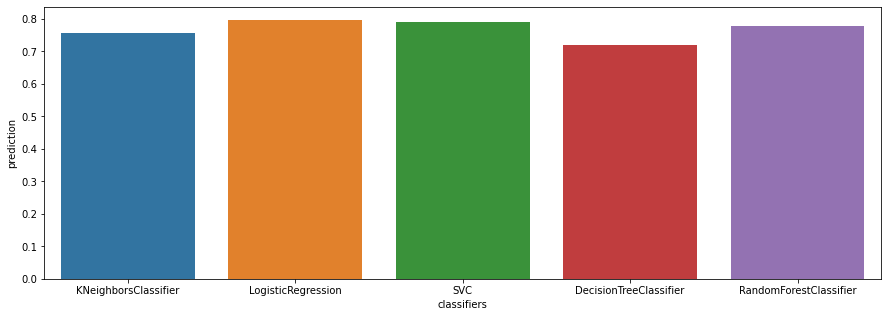

In [61]:
plt.figure(figsize = (15,5))
sns.barplot(x="classifiers",y="prediction", data=data)
plt.show()

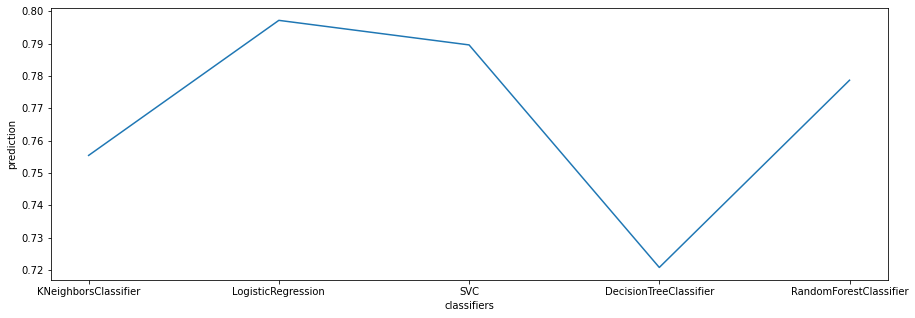

In [62]:
plt.figure(figsize = (15,5))
sns.lineplot(x="classifiers",y="prediction", data=data)
plt.show()